**PROJECT TITLE** **:** **Laptop Price Prediction for SmartTech Co.**      
   **PERUMANDLA VINAY KUMAR**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


## Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving laptop data.zip to laptop data.zip


In [ ]:
df = pd.read_csv('laptop data.zip')
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Data Exploration and Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


##Visualization

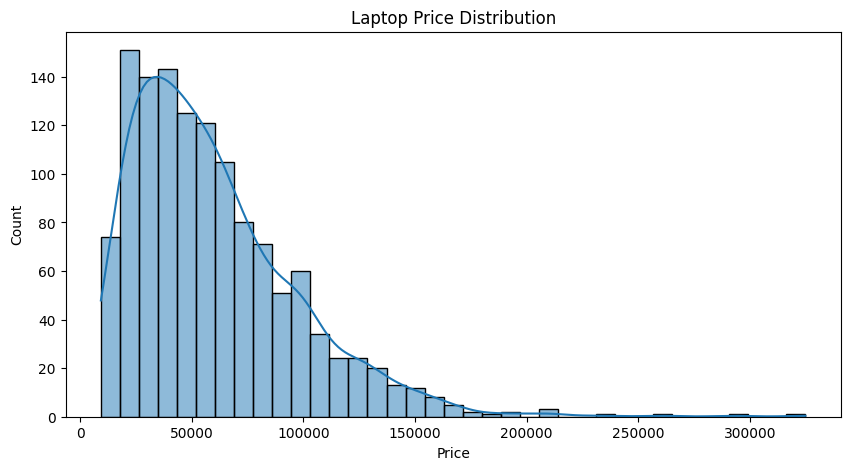

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], kde=True)
plt.title('Laptop Price Distribution')
plt.show()

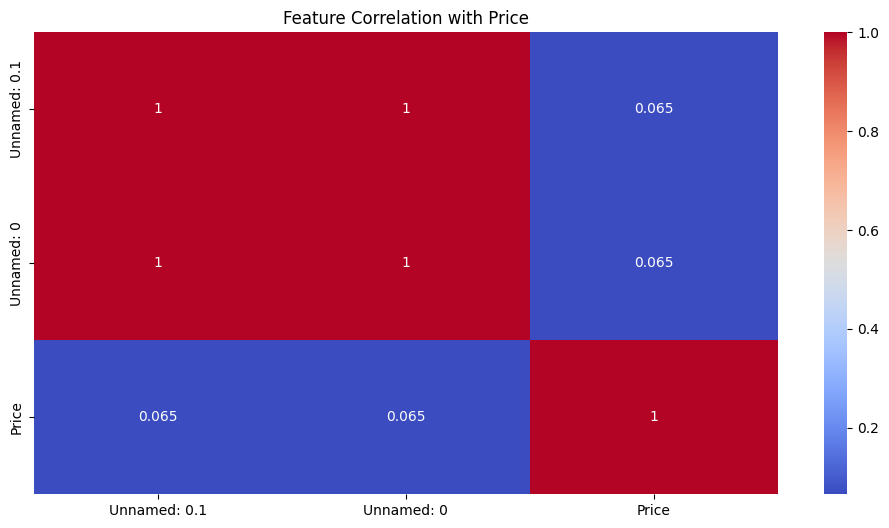

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Price')
plt.show()

##Data Preprocessing

In [ ]:
df.dropna(inplace=True)

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()


,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,1,4,7,23,65,9,4,58,8,39,71378.6832
1,1,1.0,1,4,7,1,63,9,2,51,8,36,47895.5232
2,2,2.0,7,3,14,8,74,9,16,53,4,75,30636.0000
3,3,3.0,1,4,13,25,85,1,29,9,8,72,135195.3360
4,4,4.0,1,4,7,23,67,9,16,59,8,39,96095.8080


## Model Development

In [ ]:
# Feature and target
X = df.drop('Price', axis=1)
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} R2 Score: {r2_score(y_test, preds):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_test, preds):.2f}")
    print('-'*40)


Linear Regression R2 Score: 0.47
Linear Regression MAE: 20287.76
----------------------------------------
Random Forest R2 Score: 0.81
Random Forest MAE: 10211.33
----------------------------------------
Gradient Boosting R2 Score: 0.82
Gradient Boosting MAE: 10585.85
----------------------------------------


##Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
preds = best_model.predict(X_test)

print("Tuned Random Forest R2:", r2_score(y_test, preds))


Tuned Random Forest R2: 0.8116727960782097


##Interpretability and Insights

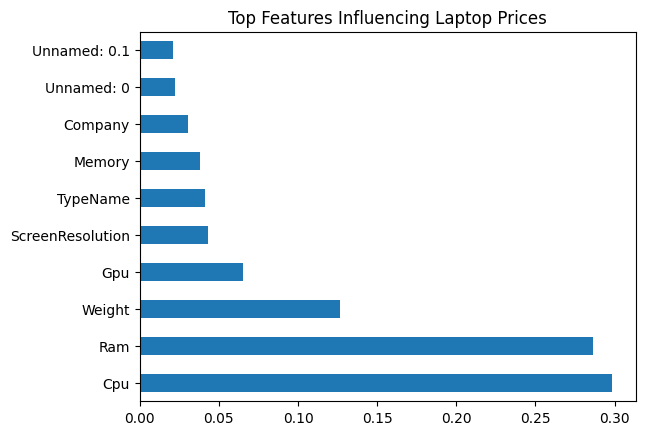

In [ ]:
# Feature importance from the best model
feat_imp = pd.Series(best_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top Features Influencing Laptop Prices")
plt.show()


## Real-time Prediction Function

In [ ]:
def predict_price(input_data, model=best_model):
    input_df = pd.DataFrame([input_data])
    for col in input_df.select_dtypes(include='object').columns:
        input_df[col] = le.fit_transform(input_df[col])
    return model.predict(input_df)[0]

# Example
sample = X_test.iloc[0].to_dict()
print("Predicted Price:", predict_price(sample))


Predicted Price: 54921.804551999994
